* Problem defination
* Data
* Evaluation
* Features
* Modelling
* Experiment

In [1]:
# Import all the tools needed
# Regular EDA(Exploratory Data Analysis) And ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

# Explore your data i.e EDA(Exploratory data analysis)
* The goal here is to find more about our data and become a subject matter expert

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart disease frequency according to Sex of a person

In [5]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [6]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


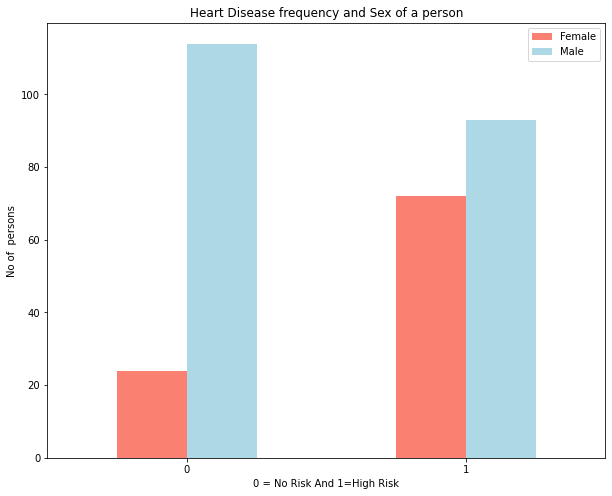

In [7]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   color=['salmon', 'lightblue'],
                                   figsize=(10,8))
plt.xlabel("0 = No Risk And 1=High Risk")
plt.title("Heart Disease frequency and Sex of a person")
plt.ylabel("No of  persons")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Age versus Mx Heart Rate for Heart Disease

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


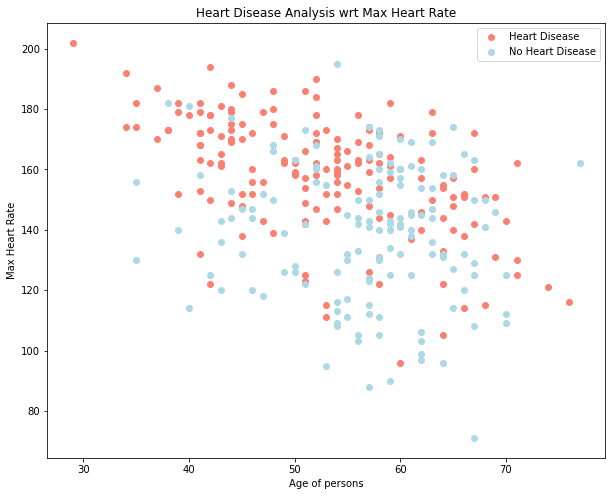

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c='salmon')
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')
plt.xlabel("Age of persons")
plt.ylabel("Max Heart Rate")
plt.title("Heart Disease Analysis wrt Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"]);

#### Viewing the Distribution of Age of peoples coming to hospital for Heart Issues



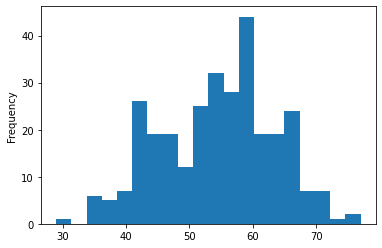

In [10]:
df.age.plot.hist(bins=20);


### Viewing analysis of heart disease wrt chest pain

In [11]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


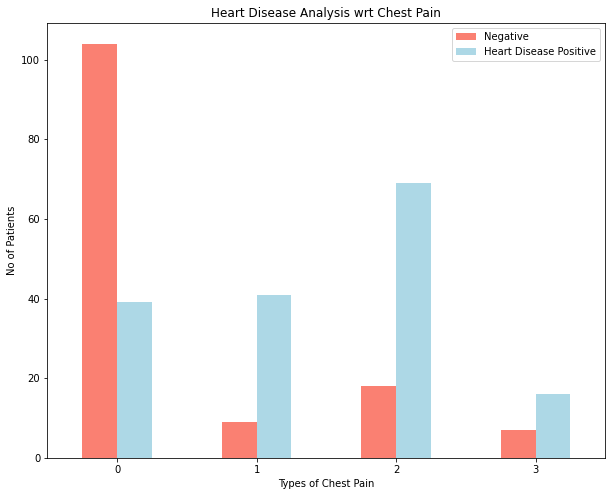

In [12]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,8),
                                  color=["salmon", "lightblue"])
plt.xlabel("Types of Chest Pain")
plt.ylabel("No of Patients")
plt.legend(["Negative", "Heart Disease Positive"])
plt.title("Heart Disease Analysis wrt Chest Pain")
plt.xticks(rotation=0);

In [13]:
# Making a Corelation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


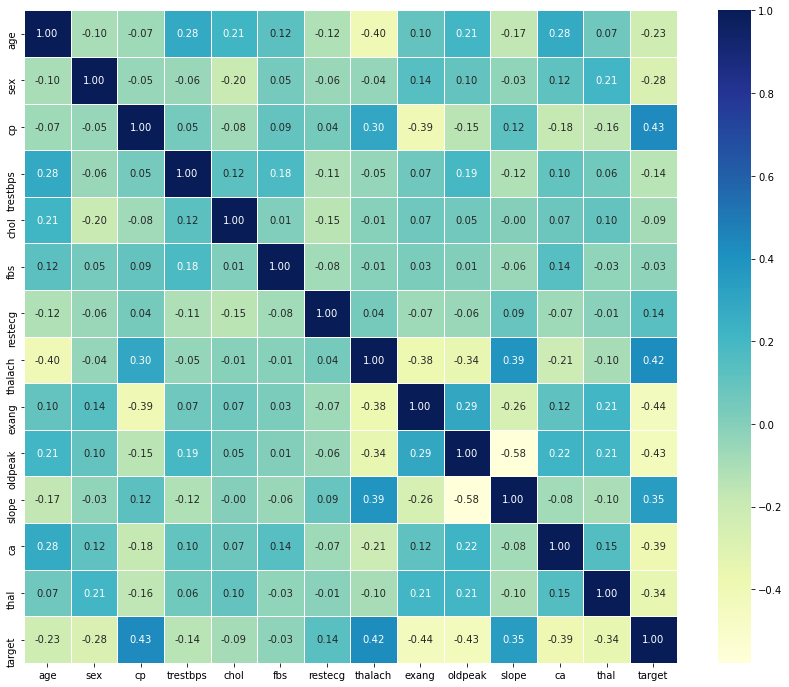

In [14]:
# Making the corelational matrix more visual

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='0.2f',
                cmap='YlGnBu',
                square=True,
                xticklabels='auto')

In [15]:
# Spliting the data into test and train sets
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model_dict = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}
# Define a model to fit and score different models
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits the model and Evaluate it to see which best fits the dataset
    """
    np.random.seed(42)
    model_score = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)

    return model_score
        

In [17]:
model_scores = fit_score(models=model_dict,
                        X_train = X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test)
model_scores

E:\ml\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.7868852459016393}

### Making this more visual

In [18]:
model_compare  = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.836066,0.639344,0.786885


<AxesSubplot:>

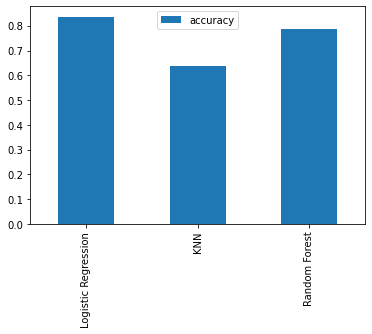

In [19]:
model_compare.T.plot(kind='bar')

* Hyperparameter tuning
* Feature Evaluation
* Precision
* Accuracy
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve(AUC)


In [20]:
# Tuning the neighbors of KNN algorithm
train_score = []
test_score = []
neighbors = range(1,21)

Knn = KNeighborsClassifier()
for i in neighbors:
    Knn.set_params(n_neighbors=i)
    # Fit the model
    Knn.fit(X_train, y_train)
    train_score.append(Knn.score(X_train, y_train))
    test_score.append(Knn.score(X_test, y_test))
    

In [21]:
train_score

[1.0,
 0.8181818181818182,
 0.7727272727272727,
 0.7520661157024794,
 0.756198347107438,
 0.7479338842975206,
 0.7396694214876033,
 0.731404958677686,
 0.743801652892562,
 0.71900826446281,
 0.731404958677686,
 0.7066115702479339,
 0.7148760330578512,
 0.7148760330578512,
 0.7066115702479339,
 0.6983471074380165,
 0.6983471074380165,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818]

In [22]:
test_score

[0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.6885245901639344,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.6065573770491803,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.5901639344262295,
 0.639344262295082,
 0.6557377049180327]

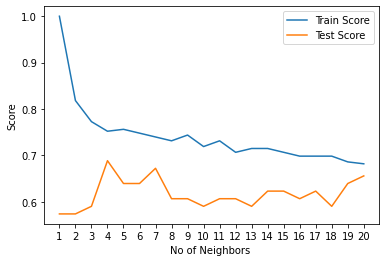

In [23]:
plt.plot(neighbors, train_score, label="Train Score")
plt.plot(neighbors, test_score, label="Test Score")
plt.xticks(np.arange(1,21))
plt.xlabel("No of Neighbors ")
plt.ylabel("Score")
plt.legend();


In [24]:
# Create Hyperparameter grid for logistic Regression
log_reg_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]}

# crate hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None, 3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)}


In [25]:
# Use Randomized SearchCV for tuning hyperparameters
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_grid,
                               n_iter=20,
                               cv=5,
                               verbose=True)
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [27]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

In [28]:
# Tuning RandomForestClassifer
np.random.seed(42)
rs_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
rs_rfc.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [30]:
rs_rfc.score(X_test, y_test)

0.7868852459016393

In [31]:
# Since our Logistic Regression model is ahead of other models as for the time being we will move forword with tuning it more 
# Using Grid SearchCV
grid_log_reg = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
np.random.seed(42)
gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=grid_log_reg,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(X_test, y_test)

0.8360655737704918

## Evaluating Our Model

In [34]:
from sklearn.metrics import plot_roc_curve
y_preds = gs_log_reg.predict(X_test)

In [35]:
np.array(y_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

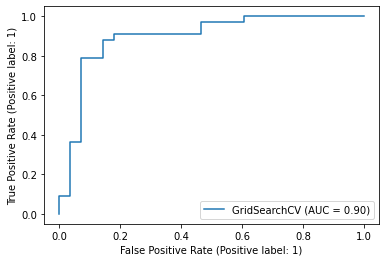

In [36]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[21,  7],
       [ 3, 30]], dtype=int64)

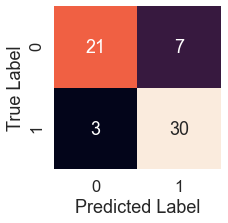

In [38]:
# Making our Connfusion matrix more visual
sns.set(font_scale=1.5)
# Fuction below
def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_matrix(y_test, y_preds)

In [39]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



## Calculate Evaluation Metrics using `cross_val_score` 

In [40]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [41]:
clf = LogisticRegression(C=0.1082636733874054,
                        solver='liblinear')

In [61]:
metric_list = {"Accuracy":"accuracy", "Precision":"precision","Recall":"recall", "F1":"f1"}
metric_score = {}
for key, value in metric_list.items():
    np.random.seed(42)
    score = round(np.mean(cross_val_score(clf,X, y, cv=5, scoring=value))*100, 2)
    metric_score[key] = score
metric_score

                                

{'Accuracy': 83.48, 'Precision': 81.83, 'Recall': 90.3, 'F1': 85.73}

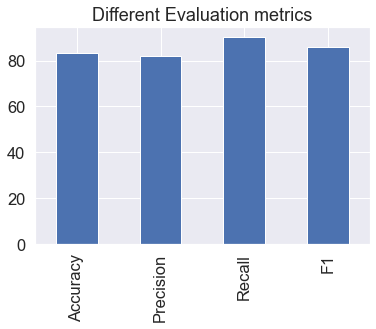

In [69]:
pd.DataFrame(metric_score, index=[0]).T.plot.bar(legend=False, title="Different Evaluation metrics");


In [71]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [72]:
# feature Importance 
# Fit an instance of Logistic Regression

clf = LogisticRegression(C=0.1082636733874054,
                        solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [75]:
# CHeck Coeff
clf.coef_

array([[ 0.00883083, -0.61960001,  0.54124755, -0.01625247, -0.0030335 ,
        -0.04356919,  0.27294495,  0.02742905, -0.48148041, -0.5010755 ,
         0.4078499 , -0.49884302, -0.58001981]])

In [84]:
# match the coeficient of features to columns of dataset
feature_dict = dict(zip(df.columns, clf.coef_[0]))

In [85]:
feature_dict

{'age': 0.008830825408895909,
 'sex': -0.6196000073356535,
 'cp': 0.5412475549758567,
 'trestbps': -0.01625246793467135,
 'chol': -0.0030335045460558293,
 'fbs': -0.04356919055374431,
 'restecg': 0.2729449471059862,
 'thalach': 0.027429051514738446,
 'exang': -0.4814804123495399,
 'oldpeak': -0.5010754958984606,
 'slope': 0.40784989647681413,
 'ca': -0.4988430218772402,
 'thal': -0.5800198091805088}

<AxesSubplot:>

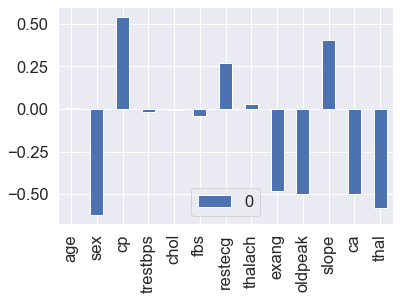

In [91]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar()

In [93]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.008831,-0.6196,0.541248,-0.016252,-0.003034,-0.043569,0.272945,0.027429,-0.48148,-0.501075,0.40785,-0.498843,-0.58002
